In [35]:
%run imports.ipynb

In [36]:
# genome regions
region_X_speciation = 'X-speciation', 'X', 15000000, 24000000 
region_X_free = 'X-free', 'X', 1, 14000000 
region_3L_free = '3L-free', '3L', 15000000, 41000000
region_3R_free = '3R-free', '3R', 1, 37000000 

In [37]:
#callset pass
callset_pass_fn = '/kwiat/vector/ag1000g/release/phase2.AR1/variation/main/hdf5/pass/ag1000g.phase2.ar1.pass.h5'
callset_pass = h5py.File(callset_pass_fn, 'r')
#callset
callset_fn = '/kwiat/vector/ag1000g/release/phase2.AR1/variation/main/hdf5/all/ag1000g.phase2.ar1.h5'
callset = h5py.File(callset_fn, 'r')
#allele_counts
allele_counts_fn = '/kwiat/vector/ag1000g/release/phase2.AR1/extras/allele_counts.h5'
allele_counts = h5py.File(allele_counts_fn, 'r')
#accessibility
acc_fn = '/kwiat/vector/ag1000g/release/phase2.AR1/accessibility/accessibility.h5'
accessibility = h5py.File(acc_fn, 'r')

In [44]:
#get pops and index
samples_fn = '/kwiat/vector/ag1000g/release/phase2.AR1/samples/samples.meta.txt'
df_samples = pandas.read_csv(samples_fn, delimiter='\t')
tbl_samples = etl.fromtsv(samples_fn)
tbl_samples = tbl_samples.addrownumbers(start=0).rename('row', 'index')
samples = tbl_samples.values('ox_code').list()
subpop_ids = sorted(tbl_samples.values('population').set())
#easier to use pandas here to get index required for subpops dict
subpops = {pid: list(df_samples[df_samples.population == pid].index) for pid in subpop_ids}

In [17]:
populations = 'AOcol', 'BFcol', 'CIcol', 'GHcol', 'GNcol', 'GW', 'GM', 'GNgam', 'GHgam', 'GQgam', 'BFgam', 'CMgam', 'UGgam', 'GAgam', 'FRgam', 'KE', 

pop_labels = {
    'AOcol': 'AO $coluzzii$', 
    'BFcol': 'BF $coluzzii$', 
    'CIcol': 'CI $coluzzii$', 
    'GHcol': 'GH $coluzzii$',
    'GNcol': 'GN $coluzzii$',  
    'GW': 'GW',
    'GM': 'GM',
    'GNgam': 'GN $gambiae$', 
    'GHgam': 'GH $gambiae$', 
    'GQgam': 'GQ $gambiae$', 
    'BFgam': 'BF $gambiae$', 
    'CMgam': 'CM $gambiae$',
    'UGgam': 'UG $gambiae$',
    'GAgam': 'GA $gambiae$', 
    'FRgam': 'FR $gambiae$', 
    'KE': 'KE',

    }

In [103]:
# #colours
# pop_colours = {
#     'AOcol': sns.color_palette('YlOrBr', 6)[5],
#     'BFcol': sns.color_palette('Oranges', 6)[3],
#     'CIcol': sns.color_palette('YlOrBr', 6)[2],
#     'GHcol': sns.color_palette('Reds', 6)[2],  
#     'GNcol': sns.color_palette('Reds', 6)[5],

# }

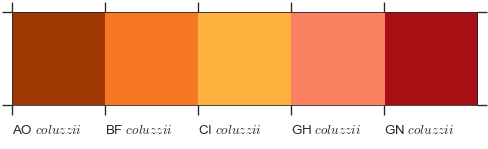

In [104]:
# sns.palplot([pop_colours[p] for p in sorted(pop_colours.keys())])
# plt.gca().set_xticklabels([pop_labels[p] for p in sorted(pop_colours.keys())], ha='left');

In [126]:
# pop_colours = {
#     'BFgam': sns.color_palette('Purples', 6)[5], 
#     'CMgam': sns.color_palette('Purples', 6)[4],    
#     'FRgam': sns.color_palette('Blues', 6)[5],
#     'GAgam': sns.color_palette('Blues', 6)[3],
    
#     'GHgam': sns.color_palette('Blues', 6)[2],
#     'GNgam': sns.color_palette('Greens', 6)[2],
#     'GQgam': sns.color_palette('Greens', 6)[3],
#     'UGgam': sns.color_palette('Greens', 6)[5],
    
    
    
# }

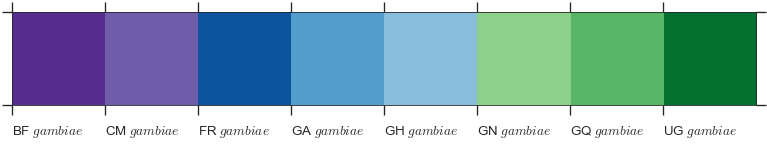

In [127]:
# sns.palplot([pop_colours[p] for p in sorted(pop_colours.keys())])
# plt.gca().set_xticklabels([pop_labels[p] for p in sorted(pop_colours.keys())], ha='left');

In [136]:
pop_colours = {
    'AOcol': sns.color_palette('YlOrBr', 6)[5],
    'BFcol': sns.color_palette('Oranges', 6)[3],
    'CIcol': sns.color_palette('YlOrBr', 6)[2],
    'GHcol': sns.color_palette('Reds', 6)[3],  
    'GNcol': sns.color_palette('Reds', 6)[5],
    
    'BFgam': sns.color_palette('Purples', 6)[5], 
    'CMgam': sns.color_palette('Purples', 6)[4],    
    'FRgam': sns.color_palette('Blues', 6)[5],
    'GAgam': sns.color_palette('Blues', 6)[4],
    
    'GHgam': sns.color_palette('Blues', 6)[2],
    'GNgam': sns.color_palette('Greens', 6)[2],
    'GQgam': sns.color_palette('Greens', 6)[3],
    'UGgam': sns.color_palette('Greens', 6)[5],
    
    'KE': sns.color_palette('Greys', 6)[5],
    'GW': sns.color_palette('Greys', 6)[2],   
    'GM': sns.color_palette('Greys', 6)[4],

}

for p in pop_colours:
    h = '#%02x%02x%02x' % tuple(int(255*c) for c in pop_colours[p])
    pop_colours[p] = h
pop_colours


{'AOcol': '#9f3703',
 'BFcol': '#f67824',
 'BFgam': '#562c91',
 'CIcol': '#feb13f',
 'CMgam': '#705da9',
 'FRgam': '#0b559f',
 'GAgam': '#2a7ab9',
 'GHcol': '#f44e38',
 'GHgam': '#88bedc',
 'GM': '#5b5b5b',
 'GNcol': '#a91016',
 'GNgam': '#8ed08b',
 'GQgam': '#56b567',
 'GW': '#acacac',
 'KE': '#2a2a2a',
 'UGgam': '#04702f'}

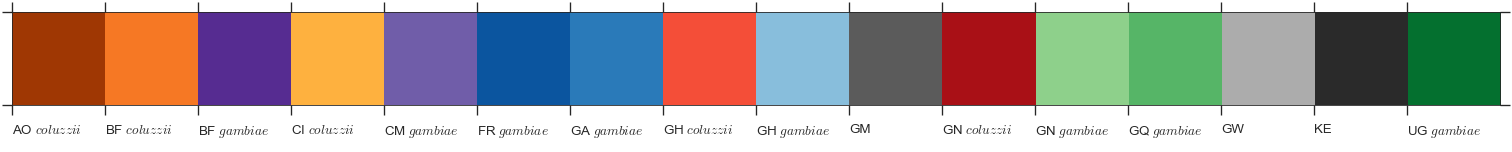

In [137]:
sns.palplot([pop_colours[p] for p in sorted(pop_colours.keys())])
plt.gca().set_xticklabels([pop_labels[p] for p in sorted(pop_colours.keys())], ha='left');